<a href="https://colab.research.google.com/github/treezy254/Time-Series/blob/master/Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

retail_sales = pd.read_csv('us-retail-sales.csv',
                           parse_dates=['Month'],
                           index_col='Month',
                           ).to_period('D')

food_sales = retail_sales.loc[:, 'FoodAndBeverage']
auto_sales = retail_sales.loc[:, 'Automobiles']

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales = pd.read_csv('train.csv',
                          dtype=dtype,
                          parse_dates=['date'],
                          infer_datetime_format = True,
                          )

store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']


### Determine trend with moving average plot

[Text(0.5, 1.0, 'US Food and Beverages'), Text(0, 0.5, 'Millions of Dolars')]

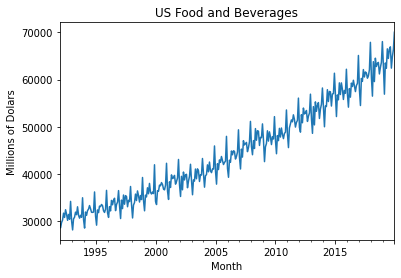

In [2]:
ax = food_sales.plot()
ax.set(title = 'US Food and Beverages', ylabel='Millions of Dolars')

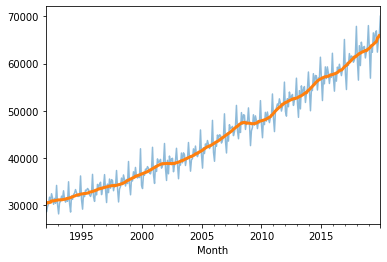

In [3]:
moving_average = food_sales.rolling(
    window=12,
    center = True,
    min_periods=6,
).mean()

trend = moving_average

ax = food_sales.plot(alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

### Identify trend

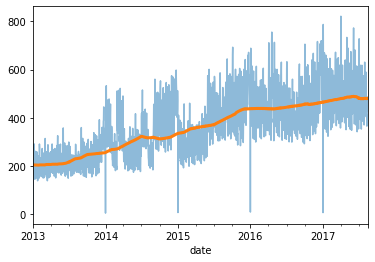

In [4]:
trend = average_sales.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = average_sales.plot(alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

### Create a Trend Feature

In [15]:
from statsmodels.tsa.deterministic import DeterministicProcess 

y = average_sales.copy()
dp = DeterministicProcess(index=y.index, order=3)

X = dp.in_sample()

X_fore = dp.out_of_sample(steps=90)


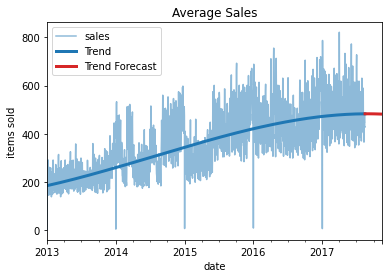

In [16]:
model = LinearRegression()

model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(alpha=0.5, title="Average Sales", ylabel='items sold')
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
ax.legend()


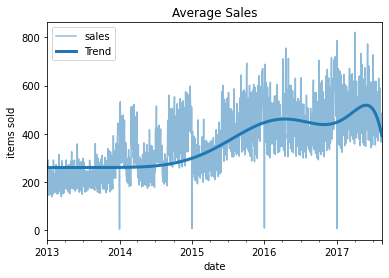

In [19]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=y.index, order=11)
X = dp.in_sample()

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend();

### Understanding risk of forecasting with high-order polynomials

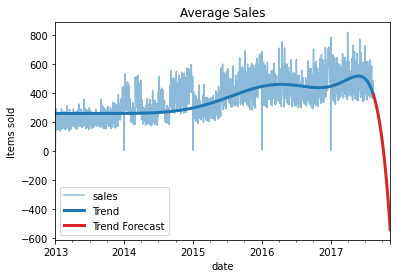

In [20]:
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(alpha=0.5, title="Average Sales", ylabel="Items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color="C0")
ax = y_fore.plot(ax=ax, linewidth=3, label='Trend Forecast', color='C3')
ax.legend()

### Fit Trends with Splines

In [ ]:
pip install scipy

In [22]:
from pyearth import Earth

y = average_sales.copy()
dp = DeterministicProcess(index=y.index, order=1)
X = dp.in_sample()

model = Earth()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(title='Average Sales', ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label='Trend')

ImportError: ignored

In [ ]:
y_detrended = y - y_pred 
y_detrended.plot(title="Detrended Average Sales")